<a href="https://colab.research.google.com/github/pp2098/Iris-Dataset/blob/main/IrisDatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

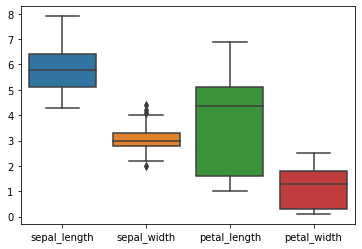

In [ ]:
sns.boxplot(data=df)

In [ ]:
df1=df.copy()
#Q3=df1.quantile(0.75)
#Q1=df1.quantile(0.25)
#IQR=Q3-Q1
#upper=np.where(df1>=Q3+1.5*IQR)
#lower=np.where(df1<=Q1-1.5*IQR)
#df1.drop(upper[0],inplace=True)
#df1.drop(lower[0],inplace=True)
#df1.shape


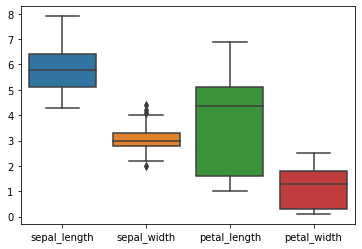

In [ ]:
sns.boxplot(data=df1)

In [ ]:
df1['species']=df1['species'].apply(lambda x:1 if x=='Iris-virginica' else 0)
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
df1['species'].value_counts()

0    100
1     50
Name: species, dtype: int64

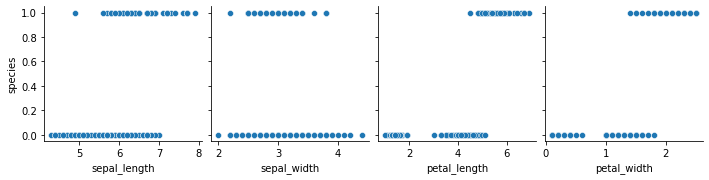

In [ ]:
sns.pairplot(data=df1,x_vars=['sepal_length','sepal_width','petal_length','petal_width'],y_vars='species',kind='scatter')

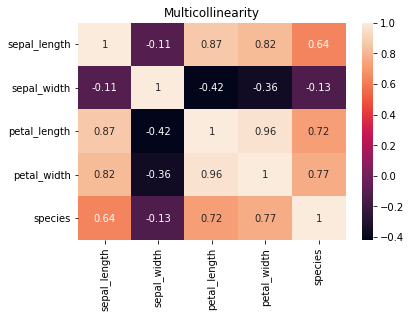

In [ ]:
sns.heatmap(df1.corr(),annot=True)
plt.title("Multicollinearity")
plt.show()

In [ ]:
df1.corr()['species'].sort_values()

sepal_width    -0.130901
sepal_length    0.638020
petal_length    0.721102
petal_width     0.769134
species         1.000000
Name: species, dtype: float64

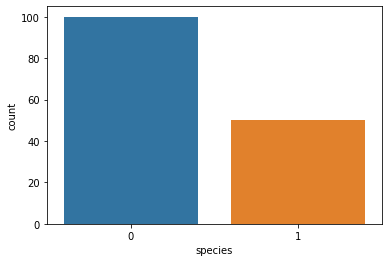

In [ ]:
sns.countplot(data=df1,x='species')

In [ ]:
X=df1.drop(('species'),axis=1)
Y=df1['species']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=101)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=100)
lg.fit(X_train,Y_train)
lg_pred=lg.predict(X_test)
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(Y_test,lg_pred))

Accuracy:  1.0


Confusion_matrix:
[[22  0]
 [ 0  8]]


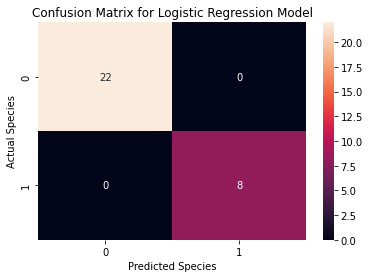

In [ ]:
conf_lg=metrics.confusion_matrix(Y_test,lg_pred)
print("Confusion_matrix:")
print(conf_lg)

sns.heatmap(conf_lg,annot=True)
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()
#TN=11,TP=8

In [ ]:
print("Clasiification report of Logistic Regression")
print(metrics.classification_report(Y_test,lg_pred))

Clasiification report of Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



AUC for Logistic Regression:  1.0


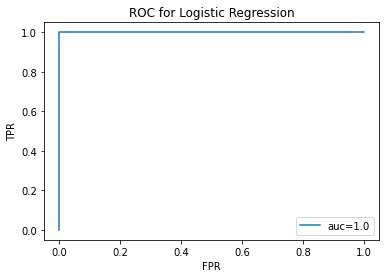

In [ ]:
lg_pred_prob=(lg.predict_proba(X_test)[::,1])
fpr,tpr,threshold=metrics.roc_curve(Y_test,lg_pred_prob)
auc=metrics.roc_auc_score(Y_test,lg_pred_prob)
print("AUC for Logistic Regression: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC for Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,X_train,Y_train,cv=10).mean()
print("Cross_Val_Score for Logistic Regression: ",score)

Cross_Val_Score for Logistic Regression:  0.95


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100)
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test,dt_pred))

Accuracy:  0.9666666666666667


In [ ]:
print("Classification report for DT Model")
print(metrics.classification_report(Y_test,dt_pred))

Classification report for DT Model
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



[[22  0]
 [ 1  7]]


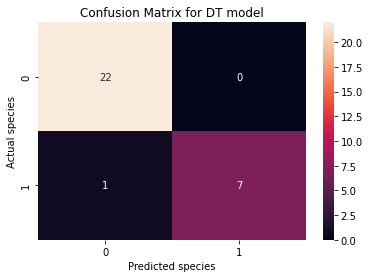

In [ ]:
conf_dt=metrics.confusion_matrix(Y_test,dt_pred)
print(conf_dt)
sns.heatmap(conf_dt,annot=True)
plt.title("Confusion Matrix for DT model")
plt.xlabel("Predicted species")
plt.ylabel("Actual species")
plt.show()
#TN=22,TP=7,FN=1,FP=0

AUC score:  0.9375


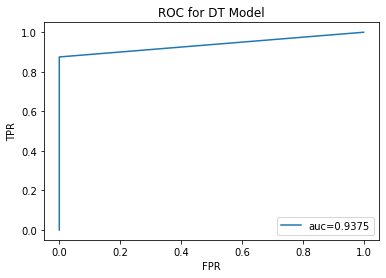

In [ ]:
dt_pred_prob=dt.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,dt_pred_prob)
auc=metrics.roc_auc_score(Y_test,dt_pred_prob)
print("AUC score: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC for DT Model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("Cross_Val_Score: ",cross_val_score(dt,X_train,Y_train,cv=10).mean())

Cross_Val_Score:  0.9333333333333332


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=200,random_state=45)
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)
rfc_pred_prob=rfc.predict_proba(X_test)[::,1]
print("Accuracy of RFC Model: ")
print(metrics.accuracy_score(Y_test,rfc_pred))

Accuracy of RFC Model: 
0.9333333333333333


In [ ]:
param_dist=({'bootstrap':[True,False],
             'criterion':['gini','entropy'],
             'max_depth':[4,5,7,9],
             'max_features':['auto','sqrt','log2',None]
             })
cv_rfc=GridSearchCV(rfc,param_grid=param_dist,scoring='accuracy',n_jobs=-1)
cv_rfc.fit(X_train,Y_train)
print(cv_rfc.best_params_)


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}


In [ ]:
rfc.set_params(bootstrap=True,criterion='gini',max_depth=4,max_features='auto')
rfc.get_params
rfc.fit(X_train,Y_train)
rfc_pred2=rfc.predict(X_test)
print("Accuracy after hypertuning: ",metrics.accuracy_score(Y_test,rfc_pred2))

Accuracy after hypertuning:  0.9333333333333333


In [ ]:
print("Classification report for rfc model:")
print(metrics.classification_report(Y_test,rfc_pred2))

Classification report for rfc model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.96      0.88      0.91        30
weighted avg       0.94      0.93      0.93        30



AUC Score for RFC Method:  1.0


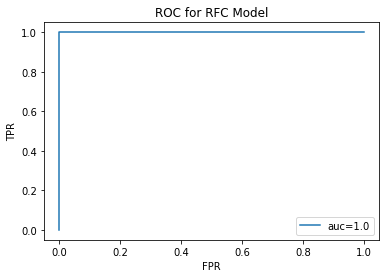

In [ ]:
rfc_pred2_prob=rfc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,rfc_pred2_prob)
auc=metrics.roc_auc_score(Y_test,rfc_pred2_prob)
print("AUC Score for RFC Method: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC for RFC Model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='linear',gamma=0.1,random_state=4)
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test,svc_pred))

Accuracy:  1.0


In [ ]:
param_dist=({'C':[1,10,100,1000],
             'kernel':['linear','ploy','rbf'],
             'gamma':[0.1,0.01,0.001,0.0001]
             })
cv_rfc=GridSearchCV(svc,param_grid=param_dist,n_jobs=-1,cv=10)
cv_rfc.fit(X_train,Y_train)
print(cv_rfc.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", lin

In [ ]:
print("Classification report for SVM Model:")
print(metrics.classification_report(Y_test,svc_pred))

Classification report for SVM Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



AUC score for SVM Model:  1.0


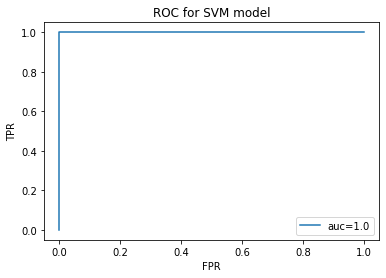

In [ ]:
#svc_pred_prob=svc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,svc_pred)
auc=metrics.roc_auc_score(Y_test,svc_pred)
print("AUC score for SVM Model: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC for SVM model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("Cross_Val_Score for SVM Model: ",cross_val_score(svc,X_train,Y_train,cv=10).mean())

Cross_Val_Score for SVM Model:  0.975


Confusion Matrix for SVM model
[[22  0]
 [ 0  8]]


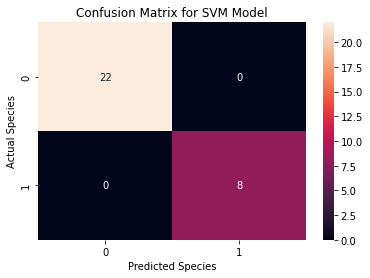

In [ ]:
conf_svm=metrics.confusion_matrix(Y_test,svc_pred)
print("Confusion Matrix for SVM model")
print(conf_svm)
sns.heatmap(conf_svm,annot=True)
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()
#TN=22,TP=8

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
print("Accuracy for KNN model: ",metrics.accuracy_score(Y_test,knn_pred))

Accuracy for KNN model:  0.9333333333333333


In [ ]:
accuracy_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,X,Y,cv=10)
  accuracy_rate.append(score.mean())



In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,X,Y,cv=10)
  error_rate.append(score.mean())

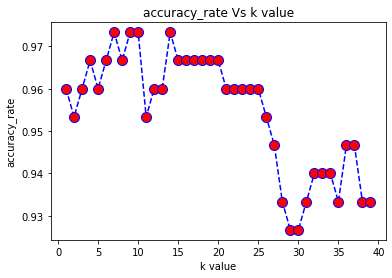

In [ ]:
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy_rate Vs k value')
plt.xlabel("k value")
plt.ylabel("accuracy_rate")
plt.show()

In [ ]:
print("Classification report for KNN model")
print(metrics.classification_report(Y_test,knn_pred))

Classification report for KNN model
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.96      0.88      0.91        30
weighted avg       0.94      0.93      0.93        30



Confusion Matrix for KNN Model
[[22  0]
 [ 2  6]]


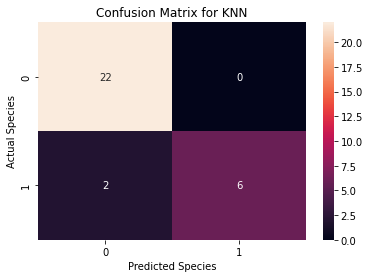

In [ ]:
conf_knn=metrics.confusion_matrix(Y_test,knn_pred)
print("Confusion Matrix for KNN Model")
print(conf_knn)
sns.heatmap(conf_knn,annot=True)
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()
#TN=22,TP=6,FN=2

AUC for KNN model:  1.0


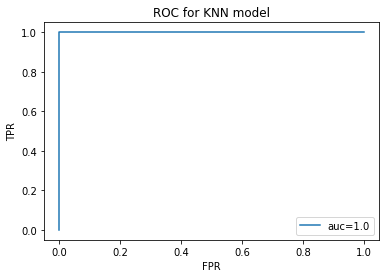

In [ ]:
knn_pred_prob=knn.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,knn_pred_prob)
auc=metrics.roc_auc_score(Y_test,knn_pred_prob)
print("AUC for KNN model: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC for KNN model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("Cross_Val_Score for KNN Model: ",cross_val_score(knn,X_train,Y_train,cv=10).mean())

Cross_Val_Score for KNN Model:  0.9416666666666667
